In [77]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.manifold import TSNE

In [78]:
ds = pd.read_csv('spotify-2023.csv', encoding='latin-1')
ds.keys()

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [79]:
ds.drop('track_name', inplace=True, axis=1)
ds.drop('artist(s)_name', inplace=True, axis=1)
LE = LabelEncoder()
ds['key'] = LE.fit_transform(ds['key'])
ds['mode'] = LE.fit_transform(ds['mode'])
ds['streams'] = LE.fit_transform(ds['streams'])
ds['in_deezer_playlists'] = LE.fit_transform(ds['in_deezer_playlists'])
ds['in_shazam_charts'] = LE.fit_transform(ds['in_shazam_charts'])

In [80]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   artist_count          953 non-null    int64
 1   released_year         953 non-null    int64
 2   released_month        953 non-null    int64
 3   released_day          953 non-null    int64
 4   in_spotify_playlists  953 non-null    int64
 5   in_spotify_charts     953 non-null    int64
 6   streams               953 non-null    int32
 7   in_apple_playlists    953 non-null    int64
 8   in_apple_charts       953 non-null    int64
 9   in_deezer_playlists   953 non-null    int32
 10  in_deezer_charts      953 non-null    int64
 11  in_shazam_charts      953 non-null    int32
 12  bpm                   953 non-null    int64
 13  key                   953 non-null    int32
 14  mode                  953 non-null    int32
 15  danceability_%        953 non-null    int64
 16  valence_

In [81]:
scaler = preprocessing.MinMaxScaler()
names = ds.columns
ds_scaler = scaler.fit_transform(ds)
ds = pd.DataFrame(ds_scaler, columns=names)
ds.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,0.142857,1.000000,0.545455,0.433333,0.009874,1.000000,0.164557,0.063988,0.956364,0.625360,...,0.425532,0.181818,0.0,0.780822,0.913978,0.840909,0.319588,0.000000,0.053191,0.032258
1,0.000000,1.000000,0.181818,0.733333,0.027295,0.326531,0.131857,0.071429,0.458182,0.755043,...,0.191489,0.272727,0.0,0.657534,0.612903,0.738636,0.072165,0.000000,0.074468,0.032258
2,0.000000,1.000000,0.454545,0.966667,0.025838,0.768707,0.159283,0.139881,0.752727,0.971182,...,0.517730,0.636364,0.0,0.383562,0.301075,0.500000,0.175258,0.000000,0.297872,0.064516
3,0.000000,0.956989,0.636364,0.733333,0.148051,0.680272,0.911392,0.172619,0.752727,0.144092,...,0.744681,0.000000,0.0,0.438356,0.580645,0.715909,0.113402,0.000000,0.085106,0.209677
4,0.000000,1.000000,0.363636,0.566667,0.058676,0.340136,0.526371,0.125000,0.483636,0.951009,...,0.560284,0.000000,1.0,0.575342,0.204301,0.806818,0.144330,0.692308,0.085106,0.064516


In [82]:
X = ds.drop('in_spotify_charts', axis=1);
y = ds['in_spotify_charts'];

principal_components = PCA(n_components=2)
X_PCA = principal_components.fit_transform(X)
X_PCA = pd.DataFrame({'PC_1': X_PCA[:,0], 'PC_2': X_PCA[:,1]})
ds_PCA = pd.concat([X_PCA, y], axis = 1)
ds_PCA.describe()

,PC_1,PC_2,in_spotify_charts
count,9.530000e+02,9.530000e+02,953.000000
mean,-2.562949e-17,1.491170e-17,0.081697
std,5.009091e-01,3.705194e-01,0.133170
min,-6.377103e-01,-5.791544e-01,0.000000
25%,-4.343842e-01,-3.170697e-01,0.000000
50%,-3.455689e-01,-9.632295e-02,0.020408
75%,5.678629e-01,2.820241e-01,0.108844
max,7.186309e-01,1.120079e+00,1.000000


<Axes: xlabel='PC_1', ylabel='PC_2'>

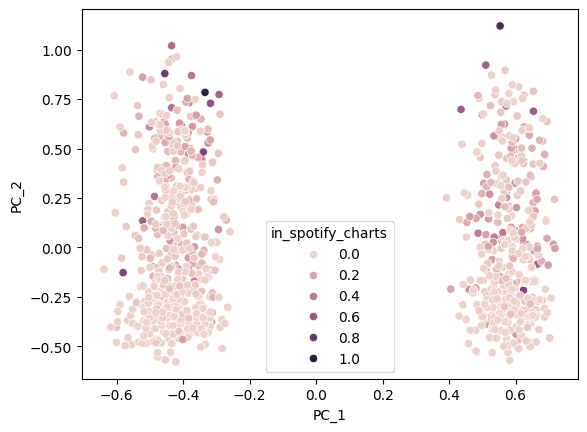

In [84]:
sns.scatterplot(data=ds_PCA, x='PC_1', y='PC_2', hue='in_spotify_charts')

In [85]:
tsne = TSNE(n_components=2, learning_rate='auto', init='pca')
X_TSNE = tsne.fit_transform(X)
X_TSNE = pd.DataFrame({'TSNE_1': X_TSNE[:,0], 'TSNE_2': X_TSNE[:,1]})
ds_TSNE = pd.concat([X_TSNE, y], axis = 1)
ds_TSNE.describe()

,TSNE_1,TSNE_2,in_spotify_charts
count,953.000000,953.000000,953.000000
mean,0.617068,-0.205623,0.081697
std,34.333042,9.122759,0.133170
min,-50.964420,-23.911766,0.000000
25%,-29.159948,-7.144602,0.000000
50%,-12.657472,-0.213902,0.020408
75%,36.474880,6.992631,0.108844
max,58.971149,23.457077,1.000000


<Axes: xlabel='TSNE_1', ylabel='TSNE_2'>

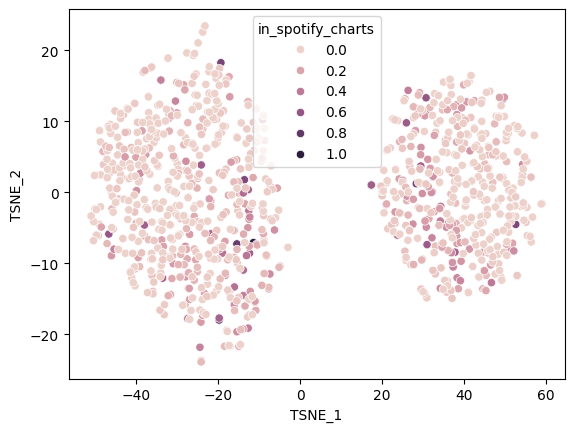

In [86]:
sns.scatterplot(data=ds_TSNE, x='TSNE_1', y='TSNE_2', hue='in_spotify_charts')

In [87]:
#________________________________________________________________________
#________________________________________________________________________
#________________________________________________________________________
#________________________________________________________________________

In [88]:
from PIL import Image
import numpy as np
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [93]:
depth_levels = [64, 32, 16, 8]
img = Image.open('elephant.jpg')
# Convert to floats instead of the default 8 bits integer coding.
img = np.array(img, dtype=np.float64) / 255

#transform to a 2D numpy array.
w, h, d = original_shape = tuple(img.shape)
#assert d == 3
img_array = np.reshape(img, (w * h, d))

img_array_sample = shuffle(img_array, random_state = 0, n_samples = 1_000)

kmeans_arr = []
labels_arr = []

for i in range(len(depth_levels)):
    kmeans_arr.append(KMeans(n_clusters = depth_levels[i], random_state = 0).fit(img_array_sample))
    labels_arr.append(kmeans_arr[i].predict(img_array))

def recreate_img(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1);

C:\Users\Andrii\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Andrii\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Andrii\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Andrii\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

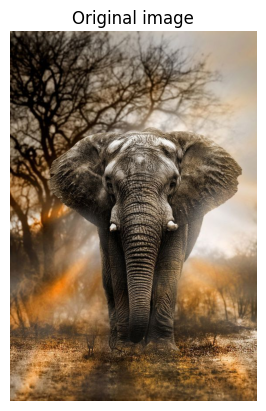

In [94]:
plt.figure(i)
plt.clf()
plt.axis("off")
plt.title("Original image")
plt.imshow(img)

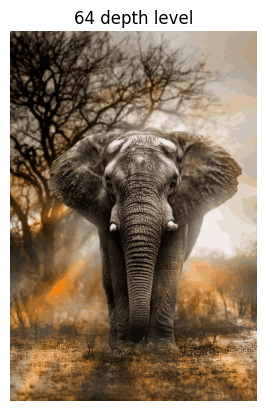

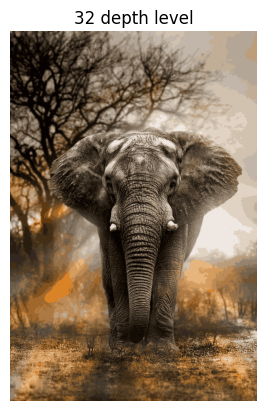

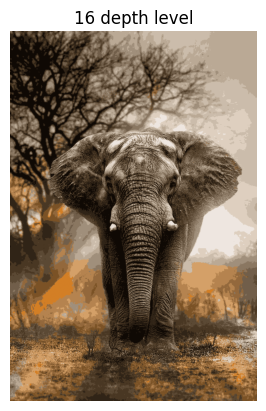

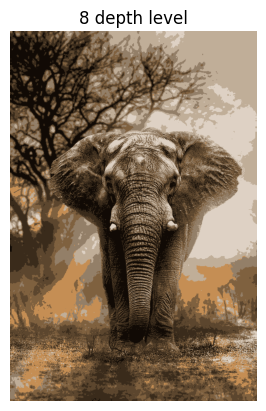

In [95]:
for i in range(len(depth_levels)):
    plt.figure(i+1)
    plt.clf()
    plt.axis("off")
    plt.title(f"{n_colors[i]} depth level")
    plt.imshow(recreate_img(kmeans_arr[i].cluster_centers_, labels_arr[i], w, h))

In [61]:
#________________________________________________________________________
#________________________________________________________________________
#________________________________________________________________________
#________________________________________________________________________

In [96]:
import chardet
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
import wordcloud
from wordcloud import STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Andrii\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:
with open('spotify-2023.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
ds = pd.read_csv('spotify-2023.csv', encoding=result['encoding'])
ds = ds.drop(columns=['artist(s)_name', 'artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'], axis = 1)
ds = ds.rename(columns={"track_name":"track", "in_spotify_charts":"chart"})

cols_to_check = ['track','chart']
ds[cols_to_check] = ds[cols_to_check].replace({'½':''}, regex=True)
ds[cols_to_check] = ds[cols_to_check].replace({'ï':''}, regex=True)
ds[cols_to_check] = ds[cols_to_check].replace({'¿':''}, regex=True)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(ds)

                                                 track  chart
0                  Seven (feat. Latto) (Explicit Ver.)    147
1                                                 LALA     48
2                                              vampire    113
3                                         Cruel Summer    100
4                                       WHERE SHE GOES     50
5                                             Sprinter     91
6                                      Ella Baila Sola     50
7                                             Columbia     43
8                                             fukumean     83
9                                      La Bebe - Remix     44
10                                           un x100to     40
11                                           Super Shy     55
12                                             Flowers    115
13                                            Daylight     98
14                                           As It Was    130
15      

In [98]:
ds.loc[ds["chart"] < 10, "chart"] = 1 #very popular
ds.loc[ds["chart"] >= 10, "chart"] = 0 #not that popular
ds

,track,chart
0,Seven (feat. Latto) (Explicit Ver.),0
1,LALA,0
2,vampire,0
3,Cruel Summer,0
4,WHERE SHE GOES,0
...,...,...
948,My Mind & Me,1
949,Bigger Than The Whole Sky,1
950,A Veces (feat. Feid),1
951,En La De Ella,1


In [99]:
def data_processing(value):
    punctuation_removal = []
    stopwords_removal_string = ''
    
    for i in value:
        if i not in string.punctuation:
            punctuation_removal.append(i)
    punctuation_removal = "".join(punctuation_removal).split()
    
    for j in punctuation_removal:
        if j.lower() not in stopwords.words("english"):
            stopwords_removal_string += j.lower() + ' '
    
    return stopwords_removal_string

ds['track'] = ds['track'].apply(data_processing)

In [100]:
ds.head()

,track,chart
0,seven feat latto explicit ver,0
1,lala,0
2,vampire,0
3,cruel summer,0
4,goes,0


In [101]:
def wordcloud_visualisation(label):
    text = ' '.join(ds[ds['chart'] == label]['track'])
    stopwords = set(wordcloud.STOPWORDS)
    wc_figure = wordcloud.WordCloud(stopwords=STOPWORDS, background_color='white', width=1000, height=700).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(wc_figure)  
    plt.axis('off')
    plt.show()

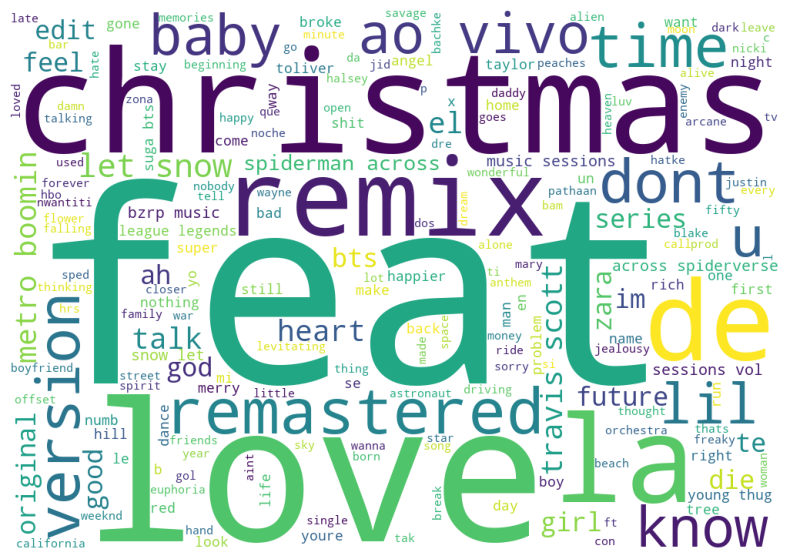

In [102]:
wordcloud_visualisation(1)

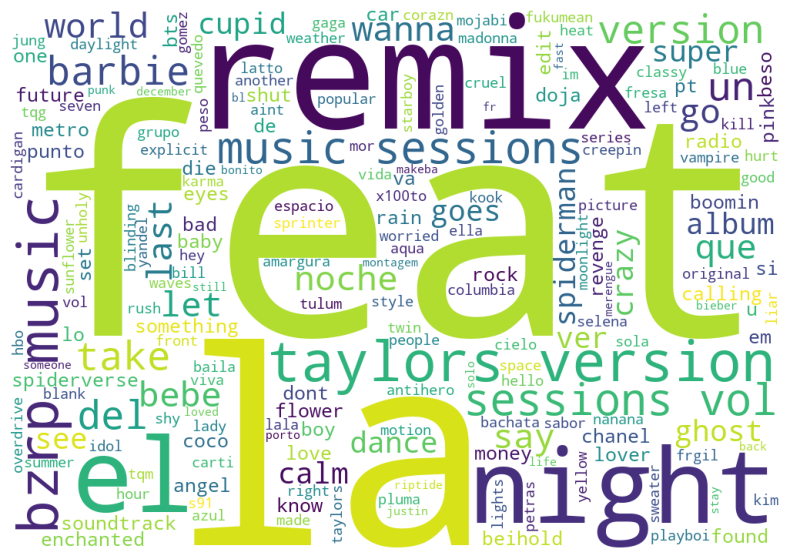

In [103]:
wordcloud_visualisation(0)

In [104]:
X = ds['track']
y = ds['chart']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

TfidfV = TfidfVectorizer()
X_train_vector = TfidfV.fit_transform(X_train)
X_test_vector = TfidfV.transform(X_test)

In [105]:
accuracy = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_vector, y_train)
    y_pred = knn.predict(X_test_vector)
    accuracy.append(accuracy_score(y_test, y_pred))
    
print("Best accuracy:", max(accuracy), "when K is", accuracy.index(max(accuracy))+1)

Best accuracy: 0.6230366492146597 when K is 34


In [106]:
knn = KNeighborsClassifier(n_neighbors = accuracy.index(max(accuracy))+1)
knn.fit(X_train_vector, y_train)
y_pred = knn.predict(X_test_vector)

print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.05      0.10        76
           1       0.61      1.00      0.76       115

    accuracy                           0.62       191
   macro avg       0.81      0.53      0.43       191
weighted avg       0.77      0.62      0.50       191



[[  4  72]
 [  0 115]]
